In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

random.seed(12)

# Load the original data
data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/feature selection/overlaping Optimal biomarkers evaluation/data/augmented_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all_biomarkers_only.csv')
y_train = data.iloc[:, -1].values

# Assign the remaining columns to x_train
X_train = data.iloc[:, :-1].values

# Create the Random Forest classifier
clf_true = RandomForestClassifier(n_estimators=100 , random_state=42,)

# Calculate accuracy using cross-validation
cv_scores_accuracy = cross_val_score(clf_true, X_train, y_train, cv=5)

# Print cross-validation accuracy
print("Cross-Validation Accuracy Scores:", cv_scores_accuracy)
print("Mean Accuracy:", np.mean(cv_scores_accuracy))


Cross-Validation Accuracy Scores: [0.83783784 0.98198198 0.96396396 0.99090909 0.99090909]
Mean Accuracy: 0.9531203931203931


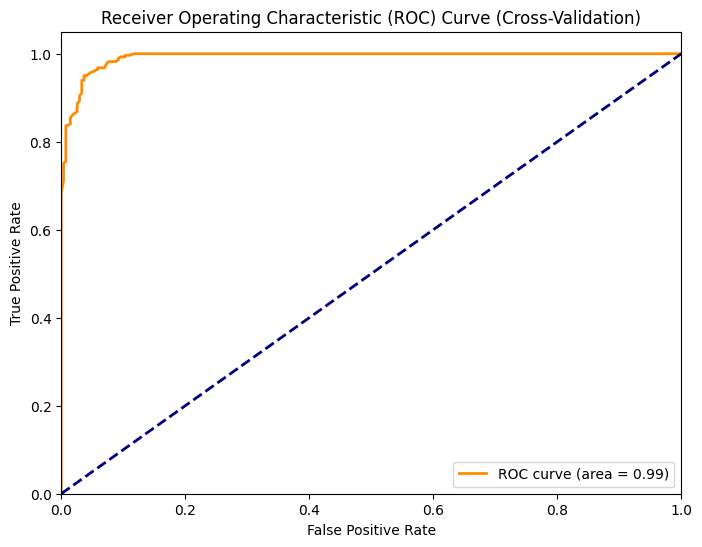

In [3]:
# Obtain predicted probabilities using cross-validation
y_true_prob_cv_true = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calculate the ROC curve
fpr_cv_true, tpr_cv_true, thresholds_cv_true = roc_curve(y_train, y_true_prob_cv_true)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc_cv_true = roc_auc_score(y_train, y_true_prob_cv_true)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_true, tpr_cv_true, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv_true))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

In [4]:
# Perform cross-validation and get the fitted models
cv_results_true = cross_validate(clf_true, X_train, y_train, cv=5, return_train_score=False, return_estimator=True)

# Access the last fitted estimator (model) from cross-validation
clf_true_fitted = cv_results_true['estimator'][-1]

# Get feature importances after fitting
feature_importances = clf_true_fitted.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': data.columns[:-1], 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 5 features
top_5_features = feature_importance_df.head(5)

# Print the top 5 features
print("Top 5 Features:")
print(top_5_features)


Top 5 Features:
    Feature  Importance
26   CCDC65    0.062765
210  ZNF239    0.056777
134  OTUD7A    0.054512
40   CEP126    0.041386
188   TCTN2    0.036861


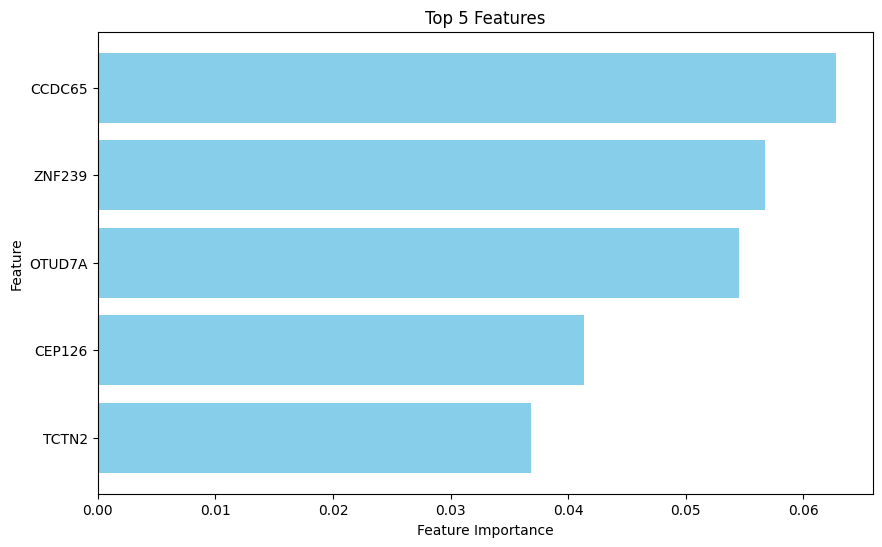

In [5]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

Top 10 Features:
      Feature  Importance
26     CCDC65    0.062765
210    ZNF239    0.056777
134    OTUD7A    0.054512
40     CEP126    0.041386
188     TCTN2    0.036861
100  KIAA1671    0.036148
43      CLIC5    0.035017
171   SLC4A10    0.034164
112    MAGEE1    0.029251
145     PTCH1    0.028963


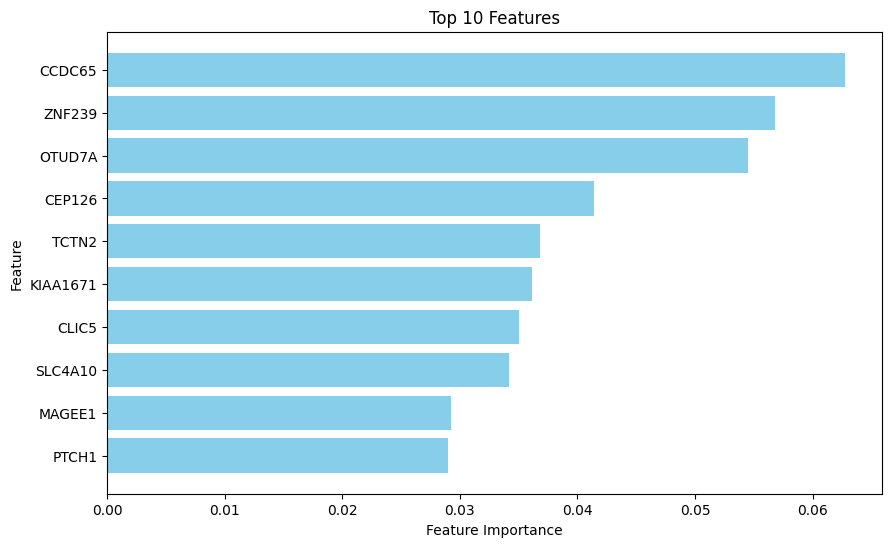

In [6]:
# Get the top 5 features
top_10_features = feature_importance_df.head(10)

# Print the top 5 features
print("Top 10 Features:")
print(top_10_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

In [7]:
# import joblib


# # Train a Random Forest classifier using only the top 5 features
# clf_top5 = RandomForestClassifier(n_estimators=100)
# X_train_top5 = data[top_5_features['Feature']].values


# # Calculate accuracy using cross-validation
# cv_scores_accuracy_top5 = cross_val_score(clf_top5, X_train_top5, y_train, cv=5)

# # Print cross-validation accuracy
# print("Cross-Validation Accuracy Scores:", cv_scores_accuracy_top5)
# print("Mean Accuracy:", np.mean(cv_scores_accuracy_top5))



In [8]:
import joblib

# Train a Random Forest classifier using only the top 5 features
clf_top5 = RandomForestClassifier(n_estimators=100)
X_train_top5 = data[top_5_features['Feature']].values

# Calculate accuracy using cross-validation
cv_scores_accuracy_top5 = cross_val_score(clf_top5, X_train_top5, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy_top5 = np.mean(cv_scores_accuracy_top5)

# Calculate the mean cross-validated AUC
mean_auc_top5 = np.mean(cross_val_score(clf_top5, X_train_top5, y_train, cv=5, scoring='roc_auc'))


# Fit the model on the entire dataset
clf_top5.fit(X_train_top5, y_train)

# Save the trained model to a file
model_filename = '/content/drive/MyDrive/thesis/Redo/feature selection/overlaping Optimal biomarkers evaluation/data/rf_model_top5_features_severity.joblib'
joblib.dump(clf_top5, model_filename)

# Print mean accuracy and a message indicating that the model is saved
print("Mean Cross-Validated Accuracy:", mean_accuracy_top5)
print("Mean Cross-Validated AUC:", mean_auc_top5)
print(f"Model saved as {model_filename}")

Mean Cross-Validated Accuracy: 0.9423095823095824
Mean Cross-Validated AUC: 0.9729892597655756
Model saved as /content/drive/MyDrive/thesis/Redo/feature selection/overlaping Optimal biomarkers evaluation/data/rf_model_top5_features_severity.joblib


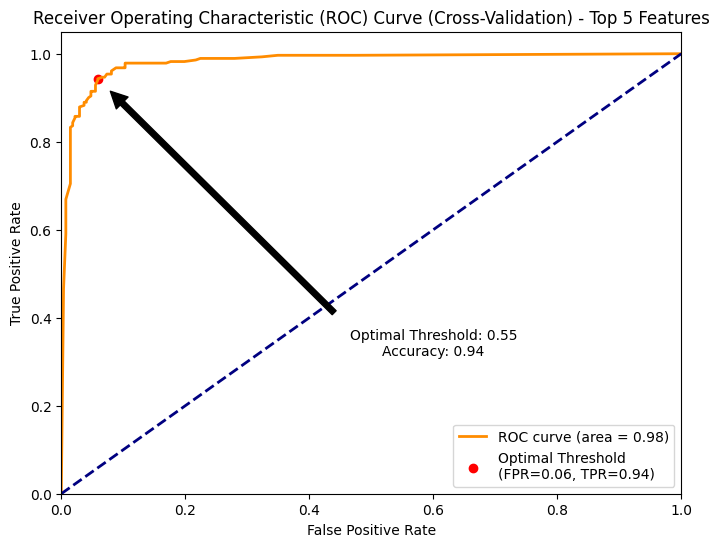

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import numpy as np


#there is no direct function in scikit-learn to calculate the confidence interval for ROC curves.

# Obtain predicted probabilities using cross-validation
y_true_prob_cv_top5 = cross_val_predict(clf_top5, X_train_top5, y_train, cv=5, method='predict_proba')[:, 1]

# Calculate the ROC curve
fpr_cv_top5, tpr_cv_top5, thresholds_cv_top5 = roc_curve(y_train, y_true_prob_cv_top5)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc_cv_top5 = roc_auc_score(y_train, y_true_prob_cv_top5)

# Find optimal threshold (you may adjust this based on your specific criteria)
optimal_threshold_index = np.argmax(tpr_cv_top5 - fpr_cv_top5)
optimal_threshold = thresholds_cv_top5[optimal_threshold_index]
optimal_accuracy = (tpr_cv_top5[optimal_threshold_index] + (1 - fpr_cv_top5[optimal_threshold_index])) / 2
# optimal_ppv = tpr_cv_top5[optimal_threshold_index] / (tpr_cv_top5[optimal_threshold_index] + fpr_cv_top5[optimal_threshold_index])
# optimal_npv = (1 - fpr_cv_top5[optimal_threshold_index]) / (1 - tpr_cv_top5[optimal_threshold_index])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_top5, tpr_cv_top5, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv_top5))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_cv_top5[optimal_threshold_index], tpr_cv_top5[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold\n(FPR={fpr_cv_top5[optimal_threshold_index]:.2f}, TPR={tpr_cv_top5[optimal_threshold_index]:.2f})')
# plt.annotate(f'Accuracy: {optimal_accuracy:.2f}\nPPV: {optimal_ppv:.2f}\nNPV: {optimal_npv:.2f}',
#              xy=(fpr_cv_top5[optimal_threshold_index], tpr_cv_top5[optimal_threshold_index]),
#              xytext=(0.6, 0.3), textcoords='axes fraction',
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=10, ha='center')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.2f}\nAccuracy: {optimal_accuracy:.2f}',
             xy=(fpr_cv_top5[optimal_threshold_index], tpr_cv_top5[optimal_threshold_index]),
             xytext=(0.6, 0.3), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation) - Top 5 Features')
plt.legend(loc="lower right")
plt.show()


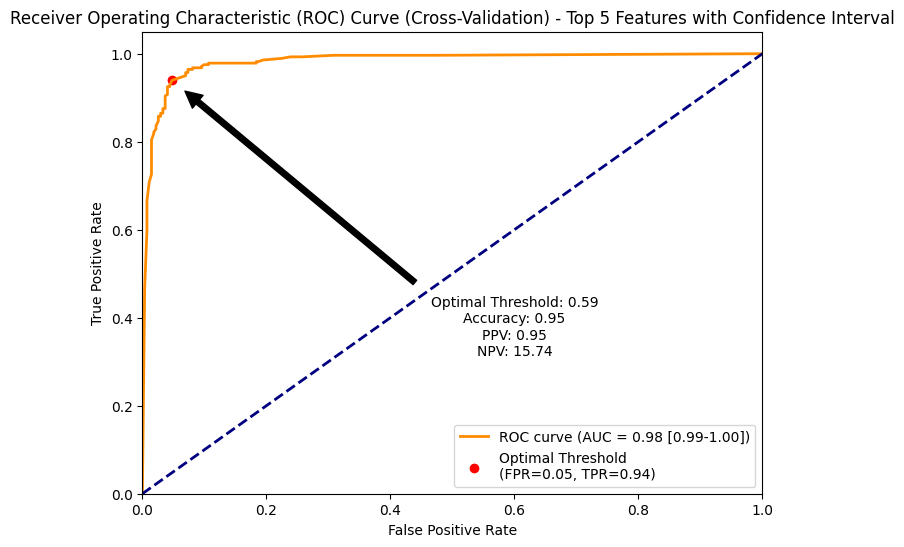

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import numpy as np

# Function to compute ROC curve and AUC for a given set of predictions and labels
def compute_roc_auc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return fpr, tpr, auc

# Function to compute bootstrapped ROC curves and AUCs
def bootstrap_roc_auc(clf, X, y, n_bootstrap=100):
    bootstrapped_aucs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap, y_bootstrap = X[indices], y[indices]

        y_true_prob_cv_top5 = clf.fit(X_bootstrap, y_bootstrap).predict_proba(X)[:, 1]
        fpr, tpr, auc = compute_roc_auc(y, y_true_prob_cv_top5)
        bootstrapped_aucs.append(auc)

    return np.array(bootstrapped_aucs)

# Obtain predicted probabilities using cross-validation
y_true_prob_cv_top5 = cross_val_predict(clf_top5, X_train_top5, y_train, cv=5, method='predict_proba')[:, 1]

# Bootstrap for confidence interval
bootstrapped_aucs = bootstrap_roc_auc(clf_top5, X_train_top5, y_train)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_aucs, 2.5)
upper_bound = np.percentile(bootstrapped_aucs, 97.5)

# Calculate the ROC curve
fpr_cv_top5, tpr_cv_top5, thresholds_cv_top5 = roc_curve(y_train, y_true_prob_cv_top5)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc_cv_top5 = roc_auc_score(y_train, y_true_prob_cv_top5)

# Find optimal threshold (you may adjust this based on your specific criteria)
optimal_threshold_index = np.argmax(tpr_cv_top5 - fpr_cv_top5)
optimal_threshold = thresholds_cv_top5[optimal_threshold_index]
optimal_accuracy = (tpr_cv_top5[optimal_threshold_index] + (1 - fpr_cv_top5[optimal_threshold_index])) / 2
optimal_ppv = tpr_cv_top5[optimal_threshold_index] / (tpr_cv_top5[optimal_threshold_index] + fpr_cv_top5[optimal_threshold_index])
optimal_npv = (1 - fpr_cv_top5[optimal_threshold_index]) / (1 - tpr_cv_top5[optimal_threshold_index])

# Plot the ROC curve with confidence interval
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_top5, tpr_cv_top5, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f} [{:.2f}-{:.2f}])'.format(roc_auc_cv_top5, lower_bound, upper_bound))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_cv_top5[optimal_threshold_index], tpr_cv_top5[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold\n(FPR={fpr_cv_top5[optimal_threshold_index]:.2f}, TPR={tpr_cv_top5[optimal_threshold_index]:.2f})')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.2f}\nAccuracy: {optimal_accuracy:.2f}\nPPV: {optimal_ppv:.2f}\nNPV: {optimal_npv:.2f}',
             xy=(fpr_cv_top5[optimal_threshold_index], tpr_cv_top5[optimal_threshold_index]),
             xytext=(0.6, 0.3), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation) - Top 5 Features with Confidence Interval')
plt.legend(loc="lower right")
plt.show()


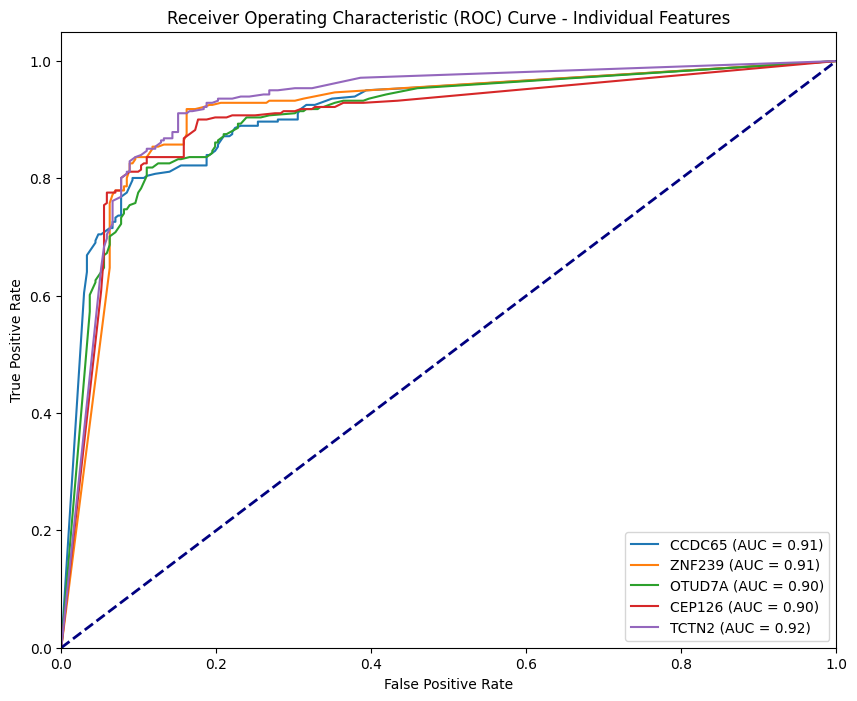

In [11]:
# Plot ROC curve for each individual feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(top_5_features['Feature']):
    # Train a model using only the current feature
    X_train_single_feature = data[[feature]].values
    y_true_prob_cv_single_feature = cross_val_predict(clf_top5, X_train_single_feature, y_train, cv=5, method='predict_proba')[:, 1]

    # Calculate the ROC curve
    fpr_cv_single_feature, tpr_cv_single_feature, _ = roc_curve(y_train, y_true_prob_cv_single_feature)

    # Calculate the AUC for the current feature
    auc_value = roc_auc_score(y_train, y_true_prob_cv_single_feature)

    # Plot the ROC curve for the current feature with legend
    plt.plot(fpr_cv_single_feature, tpr_cv_single_feature, label=f'{feature} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Individual Features')

plt.legend(loc="lower right")
plt.show()


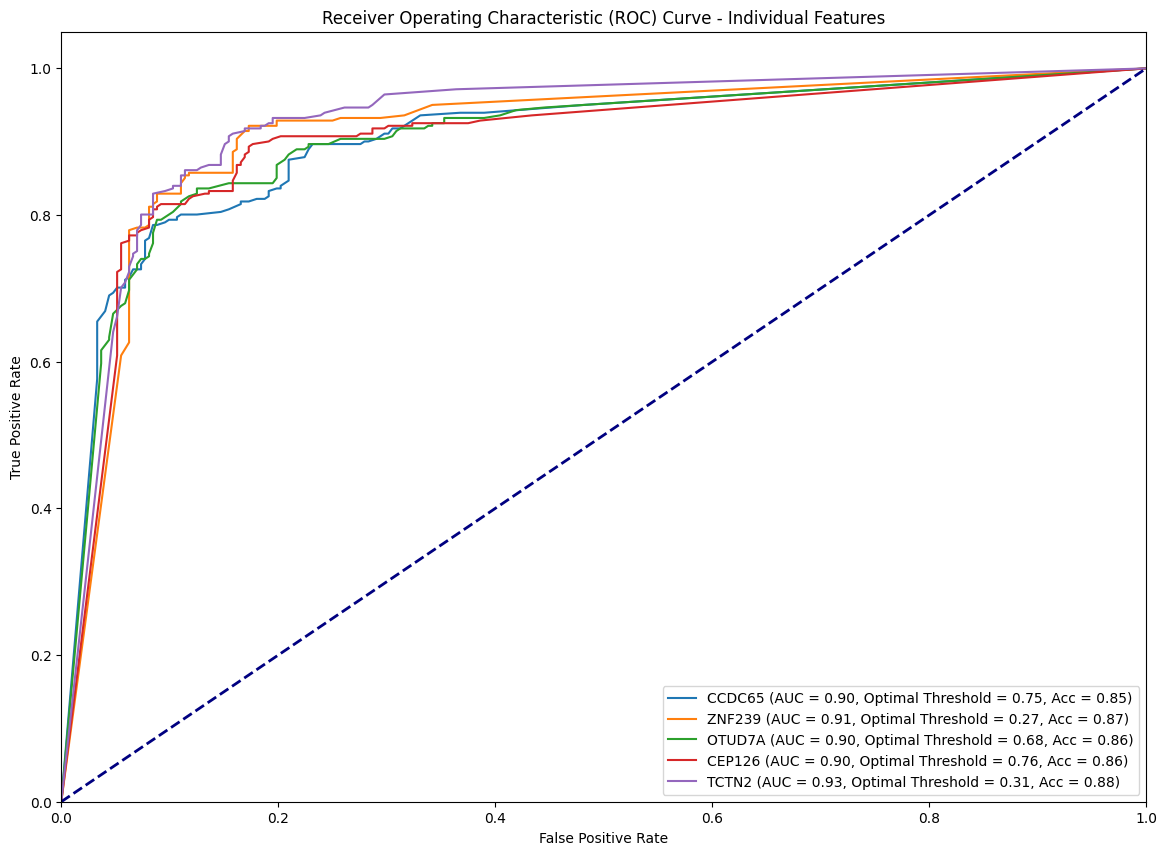

In [12]:
# Plot ROC curve for each individual feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_5_features['Feature']):
    # Train a model using only the current feature
    X_train_single_feature = data[[feature]].values
    y_true_prob_cv_single_feature = cross_val_predict(clf_top5, X_train_single_feature, y_train, cv=5, method='predict_proba')[:, 1]

    # Calculate the ROC curve
    fpr_cv_single_feature, tpr_cv_single_feature, thresholds_cv_single_feature = roc_curve(y_train, y_true_prob_cv_single_feature)

    # Find optimal threshold
    optimal_threshold_index = np.argmax(tpr_cv_single_feature - fpr_cv_single_feature)
    optimal_threshold = thresholds_cv_single_feature[optimal_threshold_index]

    # Calculate metrics at optimal threshold
    optimal_accuracy = (tpr_cv_single_feature[optimal_threshold_index] + (1 - fpr_cv_single_feature[optimal_threshold_index])) / 2
    # optimal_ppv = tpr_cv_single_feature[optimal_threshold_index] / (tpr_cv_single_feature[optimal_threshold_index] + fpr_cv_single_feature[optimal_threshold_index])
    # optimal_npv = (1 - fpr_cv_single_feature[optimal_threshold_index]) / (1 - tpr_cv_single_feature[optimal_threshold_index])

    # Plot the ROC curve for the current feature with legend
    plt.plot(fpr_cv_single_feature, tpr_cv_single_feature, label=f'{feature} (AUC = {roc_auc_score(y_train, y_true_prob_cv_single_feature):.2f}, Optimal Threshold = {optimal_threshold:.2f}, Acc = {optimal_accuracy:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Individual Features')

plt.legend(loc="lower right")
plt.show()


In [13]:
#testing overfitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming clf_top5 is your trained model
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_top5, y_train, test_size=0.2, random_state=42)

# Train the model on the training set
clf_top5.fit(X_train, y_train)

# Obtain predicted probabilities on the test set
y_test_prob = clf_top5.predict_proba(X_test)[:, 1]

# Calculate AUC on the test set
test_auc = roc_auc_score(y_test, y_test_prob)

# Obtain predicted probabilities on the training set
y_train_prob = clf_top5.predict_proba(X_train)[:, 1]

# Calculate AUC on the training set
train_auc = roc_auc_score(y_train, y_train_prob)

# Print the AUC scores
print(f'Training AUC: {train_auc:.4f}')
print(f'Test AUC: {test_auc:.4f}')


Training AUC: 1.0000
Test AUC: 0.9732
